In [91]:
import requests
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from skimage.measure import approximate_polygon
import os

In [ ]:
url = """https://idena.navarra.es/ogc/wfs"""
parameters = {
    'service': 'WFS',
    'version': '2.0.0',
    'typename': 'IDENA:HIDROG_Pol_RioPrincipal',
    'srsname': 'EPSG:4326',
    'request': 'getFeature',
    'outputFormat': 'json'
}

response = requests.post(url, data=parameters)
json = response.json()
gdf = gpd.GeoDataFrame.from_features(json["features"])
gdf.head()

In [ ]:
gdf.explore()

<AxesSubplot:>

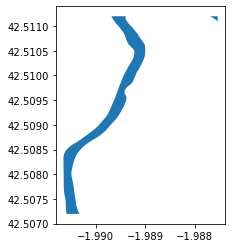

In [125]:
lat_min = 42.53
lon_min = -1.98
lat_max = 42.54
lon_max = -1.965

lat_min = 42.507197139999995
lon_min = -1.99153554
lat_max = 42.51119714
lon_max = -1.98753554

bbox = gpd.GeoSeries([Polygon([(lon_min, lat_max), (lon_max, lat_max), (lon_max, lat_min), (lon_min, lat_min)])])
bbox_gdf = gpd.GeoDataFrame({'geometry': bbox})
res_intersection = gdf.overlay(bbox_gdf, how='intersection')
res_intersection.plot()

In [126]:
import shapely as sh

def get_coords_from_polygon(geom):
    polygons = [] 
    if isinstance(geom, sh.geometry.Polygon):
        polygons.append(geom)
    elif isinstance(geom, sh.geometry.MultiPolygon):
        for polygon in geom:
            polygons.extend(get_coords_from_polygon(polygon))
    return polygons

polys = []
multipolygon = res_intersection.geometry
for geom in multipolygon:
    polys.extend(get_coords_from_polygon(geom))


In [132]:
from shapely.geometry import box, MultiPolygon
bboxs = [box(*poly.bounds) for poly in polys]
m = MultiPolygon(bboxs)

In [136]:
df = res_intersection
df.loc[[0], 'geometry'] = gpd.GeoSeries([m])

In [ ]:
df.explore()

In [ ]:
# coords = approximate_polygon(np.rot90(poly), 0.0005)

# poly_bbox = gpd.GeoSeries([Polygon(poly)])
# poly_bbox_gdf = gpd.GeoDataFrame({'geometry': poly_bbox})
# poly_bbox_gdf.explore()

In [102]:
url = """https://idena.navarra.es/ogc/wfs"""
parameters = {'service': 'WFS', 'version': '2.0.0', 'typename': 'IDENA:CATAST_Pol_Municipio', 'srsname': 'EPSG:4326', 'request': 'getFeature', 'outputFormat': 'json'}

response = requests.post(url, data=parameters)
json = response.json()
municipiosGDF = gpd.GeoDataFrame.from_features(json["features"])
municipiosGDF.head()

,geometry,FEATURE,CMUNICIPIO,MUNICIPIO,MUNINOAC,GEOM_AREA,GEOM_PERI,BEGINLIFE
0,"MULTIPOLYGON (((-0.99031 42.95654, -0.99018 42...",200020,509,Facería 9,Faceria 9,14317614.26,25936.88,31/08/2022
1,"MULTIPOLYGON (((-1.15957 42.93687, -1.15963 42...",200020,4,Abaurrepea / Abaurrea Baja,Abaurrepea/Abaurrea Baja,11107631.13,32356.55,31/08/2022
2,"MULTIPOLYGON (((-1.02765 42.70039, -1.02766 42...",200020,59,Burgui / Burgi,Burgui / Burgi,64579311.66,34330.61,31/08/2022
3,"MULTIPOLYGON (((-1.15768 42.93911, -1.15871 42...",200020,510,Facería 10,Faceria 10,607801.55,3690.44,31/08/2022
4,"MULTIPOLYGON (((-1.23425 42.63404, -1.23356 42...",200020,511,Facería 11,Faceria 11,538218.22,3110.25,31/08/2022


In [ ]:
municipiosGDF.explore()

In [29]:
url = """https://idena.navarra.es/ogc/wfs"""
parameters = {'service': 'WFS', 'version': '2.0.0', 'typename': 'IDENA:DOTACI_Sym_SNSPrimaria', 'srsname': 'EPSG:4326', 'request': 'getFeature', 'outputFormat': 'json'}

response = requests.post(url, data=parameters)
json = response.json()
centrosAtencionPrimariaGDF = gpd.GeoDataFrame.from_features(json["features"])

279    True
dtype: bool

In [71]:
centrosAtencionPrimariaGDF.head()

,geometry,FEATURE,IDCENSAN,CENSAN,CZONA,ZONA,CENTSINGDP,POBLACION,DIRECCION,CODPOSTAL,X25830,Y25830,BEGINLIFE
0,POINT (-1.60207 42.05893),7400025,00001,Centro de Salud de Tudela Este,46,TUDELA ESTE,802,TUDELA,"JUAN A. FERNANDEZ, 12",31500,615667.221,4657264.89,17/06/2019
1,POINT (-1.61057 42.06222),7400025,00002,Centro de Salud de Tudela Oeste,45,TUDELA OESTE,802,TUDELA,"GAYARRE, 17",31500,614958.282,4657617.90,17/06/2019
2,POINT (-1.68023 42.00230),7400025,00003,Centro de Salud de Cascante,50,CASCANTE,238,CASCANTE,"AVDA. CARIDAD, S/N",31520,609297.095,4650873.88,17/06/2019
3,POINT (-1.44259 41.97833),7400025,00004,Centro de Salud de Buñuel,51,BUÑUEL,223,BUÑUEL,"CRISTOBAL COLON, 19",31540,629026.275,4648543.31,17/06/2019
4,POINT (-1.80554 42.08284),7400025,00005,Centro de Salud de Cintruénigo,49,CINTRUÉNIGO,244,CINTRUENIGO,"RIBERA, 2",31592,598794.444,4659663.89,17/06/2019


In [103]:
municipiosGDF['TieneCentro'] = [centrosAtencionPrimariaGDF.within(geo).any() for key, geo in municipiosGDF.geometry.items()]

In [90]:
municipiosGDF.loc[municipiosGDF['TieneCentro'] == False].sort_values(by='GEOM_AREA', ascending=False).head(10)

,geometry,FEATURE,CMUNICIPIO,MUNICIPIO,MUNINOAC,GEOM_AREA,GEOM_PERI,BEGINLIFE,TieneCentro
172,"MULTIPOLYGON (((-1.59142 42.28822, -1.59131 42...",200020,690,Bardenas Reales,Bardenas Reales,4.184495e+08,177630.64,31/08/2022,False
152,"MULTIPOLYGON (((-1.24532 42.87641, -1.24717 42...",200020,28,Arce / Artzi,Arce / Artzi,1.463562e+08,80408.63,31/08/2022,False
188,"MULTIPOLYGON (((-2.23494 42.85069, -2.22953 42...",200020,694,Sierra de Urbasa,Sierra de Urbasa,1.144517e+08,51666.47,31/08/2022,False
287,"MULTIPOLYGON (((-1.98023 42.98901, -1.97917 42...",200020,144,Larraun,Larraun,1.077661e+08,66746.68,31/08/2022,False
195,"MULTIPOLYGON (((-1.56169 42.64216, -1.56163 42...",200020,150,Leoz / Leotz,Leoz / Leotz,9.622492e+07,60275.23,31/08/2022,False
137,"MULTIPOLYGON (((-1.19659 42.72366, -1.19658 42...",200020,209,Romanzado / Erromantzatua,Romanzado / Erromantzatua,9.169286e+07,48593.40,31/08/2022,False
291,"MULTIPOLYGON (((-1.36759 42.83700, -1.36755 42...",200020,158,Lónguida / Longida,Longuida / Longida,9.071720e+07,77588.73,31/08/2022,False
294,"MULTIPOLYGON (((-1.42607 42.82114, -1.42611 42...",200020,156,Lizoain-Arriasgoiti / Lizoainibar-Arriasgoiti,Lizoain-Arriasgoiti / Lizoain-Arriasgoiti,6.523998e+07,44108.71,31/08/2022,False
295,"MULTIPOLYGON (((-1.45272 42.71889, -1.45312 42...",200020,132,Izagaondoa,Izagaondoa,5.960535e+07,51747.33,31/08/2022,False
238,"MULTIPOLYGON (((-1.47736 42.69890, -1.47722 42...",200020,124,Ibargoiti,Ibargoiti,5.405204e+07,39954.34,31/08/2022,False


In [104]:
print(municipiosGDF.crs)

None


In [105]:
municipiosGDF = municipiosGDF.set_crs('epsg:4326')

In [106]:
directory = 'files/municipios-centros'
if not os.path.exists(directory):
    os.makedirs(directory)

municipiosGDF.to_file(directory + '/municipios-centros.shp')  

C:\Users\j.merino\AppData\Local\Temp\ipykernel_53620\3634269008.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  municipiosGDF.to_file(directory + '/municipios-centros.shp')
